Name: Sharanya Nallapeddi

PyTorch Intro, Data analysis & NN mlModels: https://pytorch.org/tutorials/beginner/introyt/introyt_index.html

Title: Data analysis, ML & NN mlModels

Step 1: Data analysis & Pre-processing

Dataset used: https://data.buffalony.gov/Public-Safety/Crime-Incidents/d6g9-xbgu/about_data

About the dataset:

Crime Incidents: This is a dataset of crime incidents in the City of Buffalo.


In [1]:
import pandas as pd
import warnings
import os
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import LabelEncoder

import re
import numpy as np
from tkinter import Tk, filedialog

Tk().withdraw()

datasetPath = filedialog.askopenfilename(title="Crime_Incidents.csv", filetypes=[("CSV Files", "*.csv")])
dataset = pd.read_csv(datasetPath)
print(f"Rows are: {dataset.shape[0]}, Columns are: {dataset.shape[1]}")

Rows are: 318735, Columns are: 31


Exploratory data analysis(EDA):

Exploratory Data Analysis (EDA) is the process of analyzing, visualizing, and summarizing a dataset to understand its structure, detect patterns, identify anomalies, and gain insights before applying machine learning models. ~ definition from google.

In [2]:
#Remove duplicate values.

dataset.drop_duplicates(keep='first', inplace=True)
from IPython.display import display

In [3]:
# Dropping rows which has more than 5 missing values
dataset2 = dataset.dropna(thresh=dataset.shape[1] - 5)

In [4]:
# Impute missing data. Replace the missing entries with the mean/median/mode of the feature.

missing_values = dataset2.isnull().sum()

# Separating numerical & categorical columns
num_cols = dataset2.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = dataset2.select_dtypes(include=['object']).columns.tolist()

for col in num_cols:
    if dataset2[col].isnull().sum() > 0:
        if dataset2[col].skew() < 1:  #When data is normally distributed- use mean
            dataset2[col].fillna(dataset2[col].mean(), inplace=True)
        else:  # For skewed data, use median
            dataset2[col].fillna(dataset2[col].median(), inplace=True)

for col in cat_cols:
    if dataset2[col].isnull().sum() > 0:
        dataset2[col].fillna(dataset2[col].mode()[0], inplace=True)

missingValues = dataset2.isnull().sum().sum()

print(f" Missing values after imputation = {missingValues}")
print(f"Rows are: {dataset2.shape[0]}, Columns are: {dataset2.shape[1]}")

 Missing values after imputation = 628846
Rows are: 314423, Columns are: 31


In [5]:
#Removing outliers

import numpy as np

# Identify numerical columns \
numeric_columns = dataset2.select_dtypes(include=[np.number]).columns.tolist()

Q1 = dataset2[numeric_columns].quantile(0.25)
Q3 = dataset2[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

dataset3 = dataset2[~((dataset2[numeric_columns] < lower_bound) | (dataset2[numeric_columns] > upper_bound)).any(axis=1)]

Any value below -> (Q1 - 1.5 * IQR) or above -> (Q3 + 1.5 * IQR) is considered as an outlier.

And IQR is Interquartile range

In [6]:
#Impute outliers. Replace the outliers with the mean/median/mode of the feature.

for col in numeric_columns:
    if dataset3[col].skew() < 1:  # If data is normally distributed, we use mean
        mean_value = dataset3[col].mean()
        dataset3[col] = np.where(
            (dataset3[col] < lower_bound[col]) | (dataset3[col] > upper_bound[col]),
            mean_value,
            dataset3[col]
        )
    else:  # If data is skewed- use median
        median_value = dataset3[col].median()
        dataset3[col] = np.where(
            (dataset3[col] < lower_bound[col]) | (dataset3[col] > upper_bound[col]),
            median_value,
            dataset3[col])

In [7]:
# Converting  categorical fields to category type
categorical_fields = ['Day of Week', 'City', 'State', 'Police District', 'Parent Incident Type', 'Incident Type Primary']
for col in categorical_fields:
    if col in dataset3.columns:
        dataset3[col] = dataset3[col].astype('category')

dataset3['Latitude'] = pd.to_numeric(dataset3['Latitude'], errors='coerce')
dataset3['Longitude'] = pd.to_numeric(dataset3['Longitude'], errors='coerce')

missing_threshold = 0.4 * dataset3.shape[0]
dataset4 = dataset3.dropna(thresh=missing_threshold, axis=1)
print(f"Rows are: {dataset4.shape[0]}")

Rows are: 314423


In [8]:
dataset5 = dataset4[~(dataset4.apply(lambda row: (row.astype(str) == 'UNKNOWN').sum(), axis=1) > 2)]
print(f"Rows are: {dataset5.shape[0]}, Columns are: {dataset5.shape[1]}")

Rows are: 298583, Columns are: 29


In [9]:
#file_path = '/Users/sharanya/Downloads/DL/Assignment 0/dataset v1.csv'
#dataset5.to_csv(file_path, index=False)

In [10]:
columnNames = dataset5.columns.tolist()
print("Column Names:")
for col in columnNames:
    print(col)

Column Names:
Case Number
Incident Datetime
Incident Type Primary
Incident Description
Parent Incident Type
Hour of Day
Day of Week
Address
City
State
Location
Latitude
Longitude
Created At
zip_code
neighborhood
Council District
Council District 2011
Census Tract
Census Block Group
Census Block
2010 Census Tract 
2010 Census Block Group
2010 Census Block
Police District
TRACTCE20
GEOID20_tract
GEOID20_blockgroup
GEOID20_block


Visulations : 5 differents kinds of visulisations are performed over https://data.buffalony.gov/Public-Safety/Crime-Incidents/d6g9-xbgu/about_data

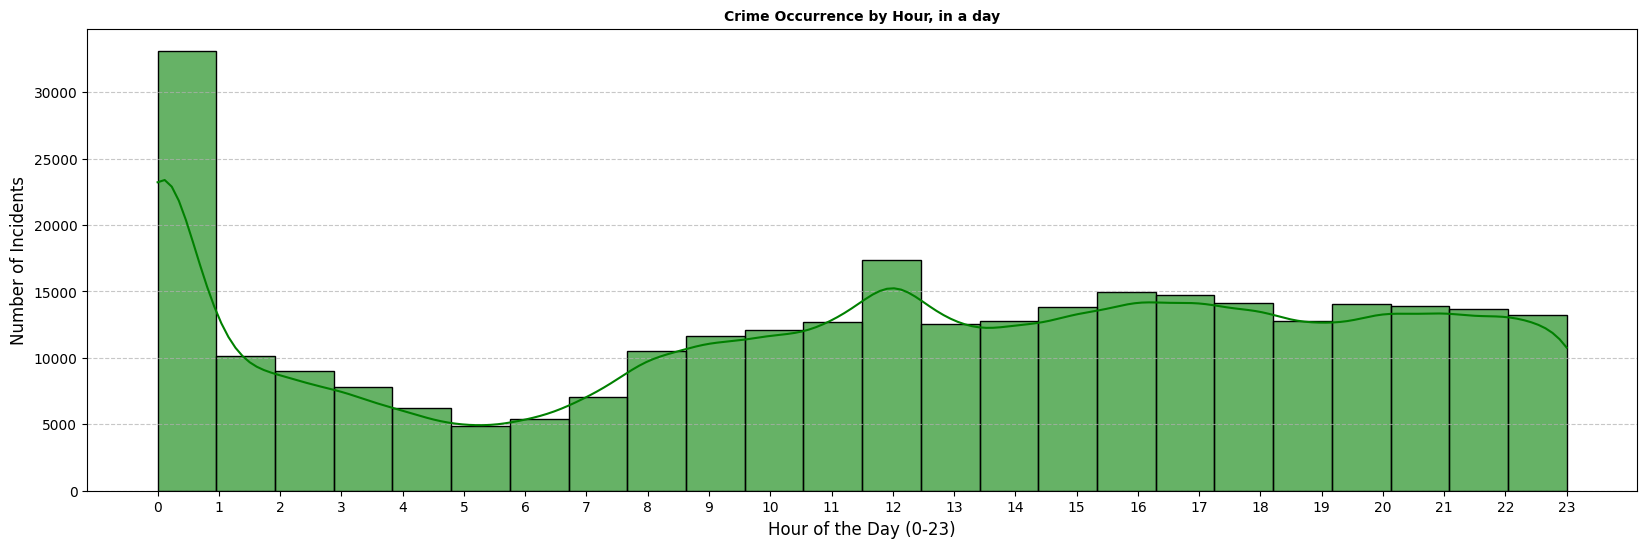

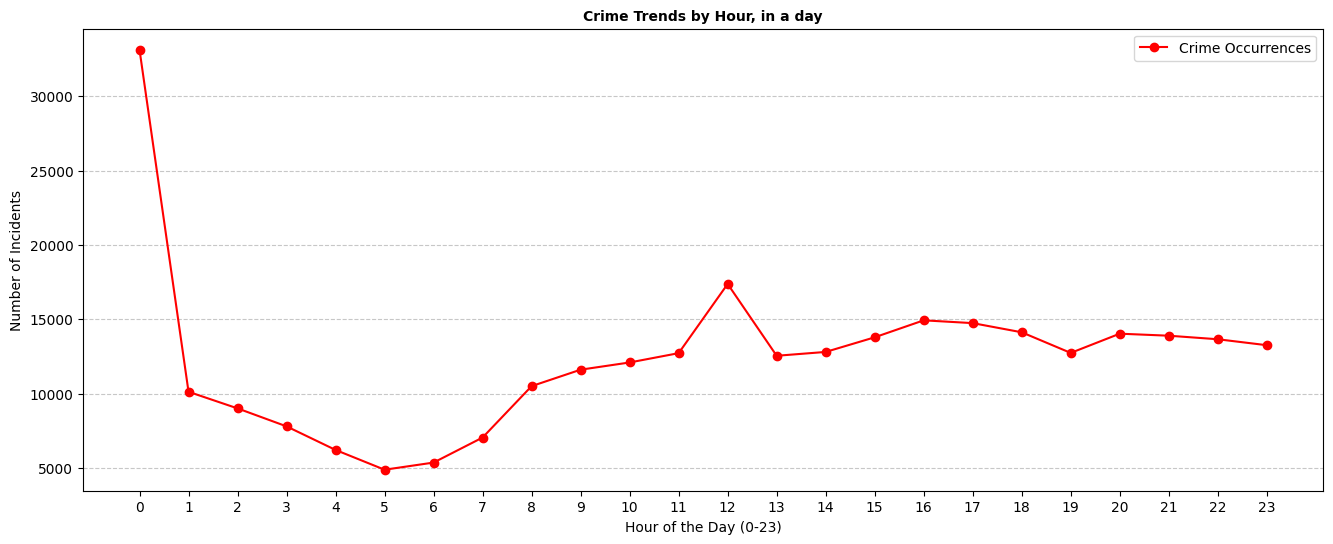

In [11]:
# Data visualization - 1
# Crime Occurrence By Hour in a day
import matplotlib.pyplot as plot
import seaborn as sns

if 'Hour of Day' in dataset3.columns:
    dataset5['Hour of Day'] = pd.to_numeric(dataset5['Hour of Day'], errors='coerce')

    plot.figure(figsize=(20, 6))
    sns.histplot(dataset5['Hour of Day'], bins=24, kde=True, color='green', alpha=0.6, edgecolor='black')

    plot.title("Crime Occurrence by Hour, in a day", fontsize=10, fontweight='bold')
    plot.xlabel("Hour of the Day (0-23)", fontsize=12)
    plot.ylabel("Number of Incidents", fontsize=12)
    plot.xticks(range(0, 24))
    plot.grid(axis='y', linestyle='--', alpha=0.7)
    plot.show()

    plot.figure(figsize=(16, 6))
    hourCount = dataset5['Hour of Day'].value_counts().sort_index()
    plot.plot(hourCount.index, hourCount.values, marker='o', linestyle='-', color='red', label='Crime Occurrences')

    plot.title("Crime Trends by Hour, in a day", fontsize=10, fontweight='bold')
    plot.xlabel("Hour of the Day (0-23)", fontsize=10)
    plot.ylabel("Number of Incidents", fontsize=10)
    plot.xticks(range(0, 24))
    plot.grid(axis='y', linestyle='--', alpha=0.7)
    plot.legend()
    plot.show()

else:
    print("Column 'Hour of Day' is not available.")


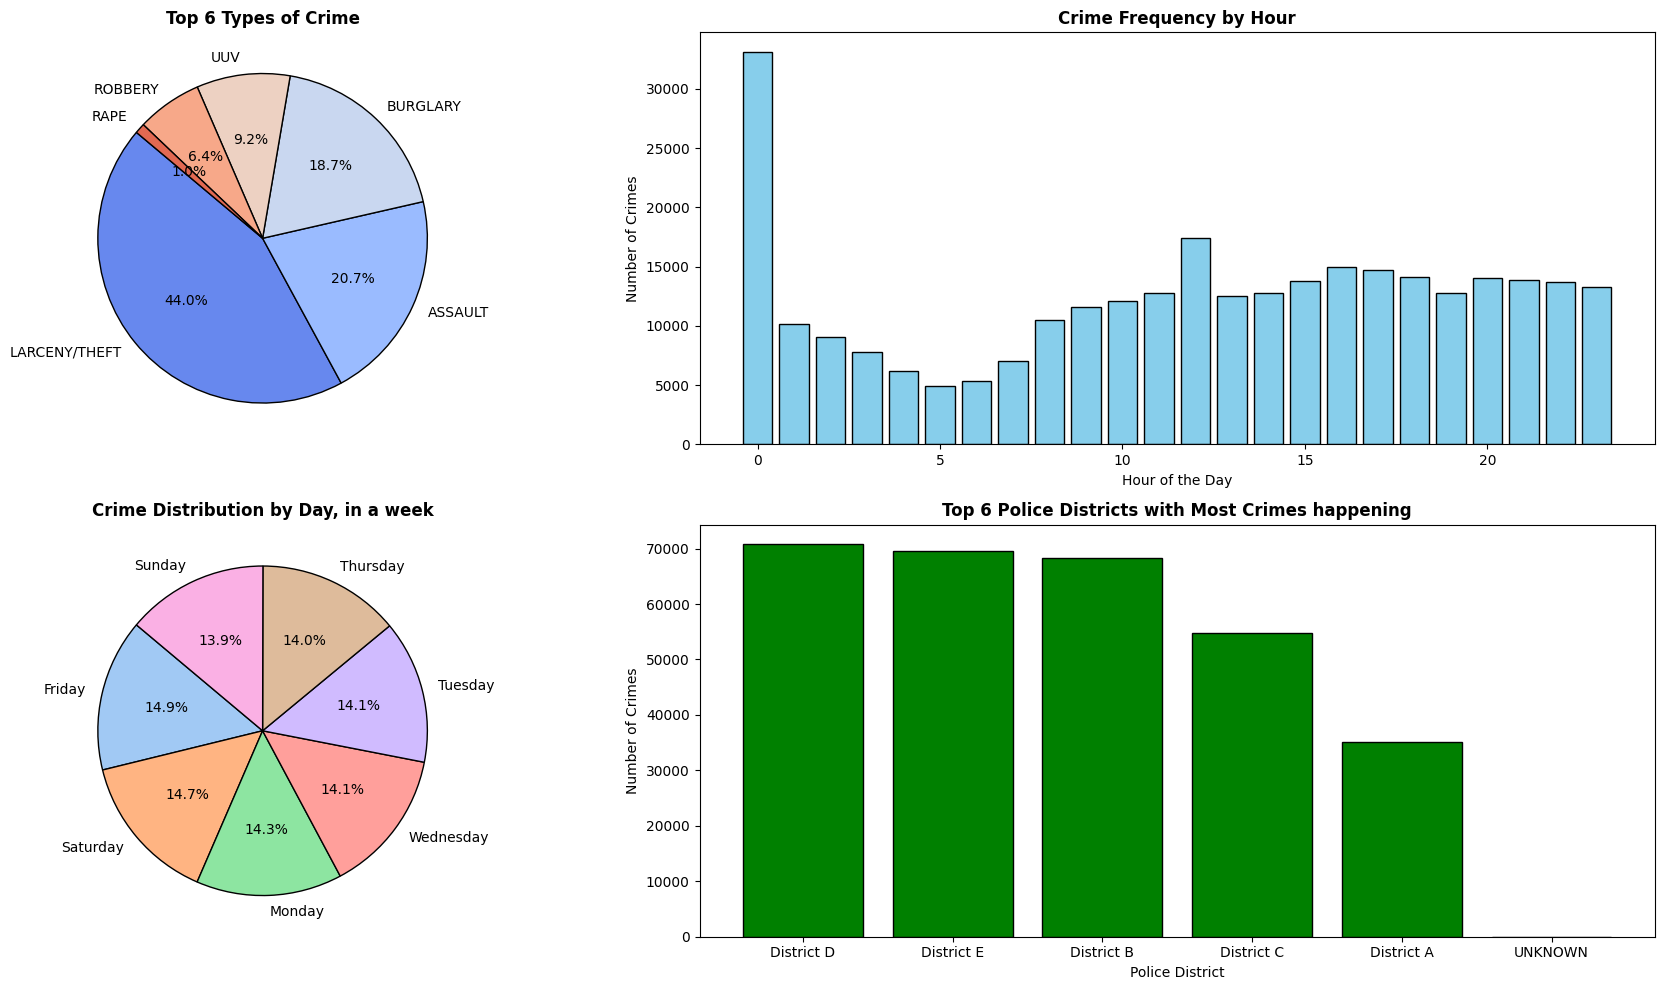

In [12]:
# Data visualization - 2
# Type of the crime

import matplotlib.pyplot as plot
import seaborn as sns

crimeTypes = dataset5["Incident Type Primary"].value_counts().nlargest(6)

crimeHour = dataset5["Hour of Day"].value_counts().sort_index()
crimeDay = dataset5["Day of Week"].value_counts()
crimeDistrict = dataset5["Police District"].value_counts().nlargest(6)

fig, axes = plot.subplots(2, 2, figsize=(19, 10))

axes[0, 0].pie(crimeTypes, labels=crimeTypes.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("coolwarm", 6), wedgeprops={"edgecolor": "black"})
axes[0, 0].set_title("Top 6 Types of Crime", fontsize=12, fontweight="bold")

axes[0, 1].bar(crimeHour.index, crimeHour.values, color="skyblue", edgecolor="black")
axes[0, 1].set_xlabel("Hour of the Day")
axes[0, 1].set_ylabel("Number of Crimes")
axes[0, 1].set_title("Crime Frequency by Hour", fontsize=12, fontweight="bold")

axes[1, 0].pie(crimeDay, labels=crimeDay.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"), wedgeprops={"edgecolor": "black"})
axes[1, 0].set_title("Crime Distribution by Day, in a week", fontsize=12, fontweight="bold")

axes[1, 1].bar(crimeDistrict.index, crimeDistrict.values, color="green", edgecolor="black")
axes[1, 1].set_xlabel("Police District")
axes[1, 1].set_ylabel("Number of Crimes")
axes[1, 1].set_title("Top 6 Police Districts with Most Crimes happening", fontsize=12, fontweight="bold")

plot.tight_layout()
plot.show()


Information depicted from the above visulaizations:


1. Theft (44%) is the most frequent crime, for almost half of all cases.
2. Assault is the 2nd most reported crime with 20.7%.
3. Burglary with 18.7% and Unauthorized Use of Vehicle (UUV - 9.2%) have the highest property crime rates with the data that is given.
4. Robbery at 6.4% and Rape at 1% are less frequent, but still has an impact.
5. Peak Time for Crime is Midnight, it is the most criminal time, mostly due to majority of thefts or violent fights.
6. Crime decreases after 2 AM but increases from 10 AM onwards, increasing again around afternoon to evening.
7. Late night & early morning see less crime, which are in sync with lower public presence.
8. Friday & Saturday have the highest, at 14.9% and 14.7%, respectively, due to the heightened activity on weekends. That doesnt mean we cant take breaks. But, the crime is 9. Also, it is actually relatively evenly distributed on Mondays to Thursdays, 14%. Sunday crimes are relatively lower at 13.9%.
10. District D & District E have the most crimes, close to 70,000+. Districts B & C report high crimes and need concentrated police enforcement.
11. District A has the least number of crimes, meaning that it has better security or it can also be because of lower population.

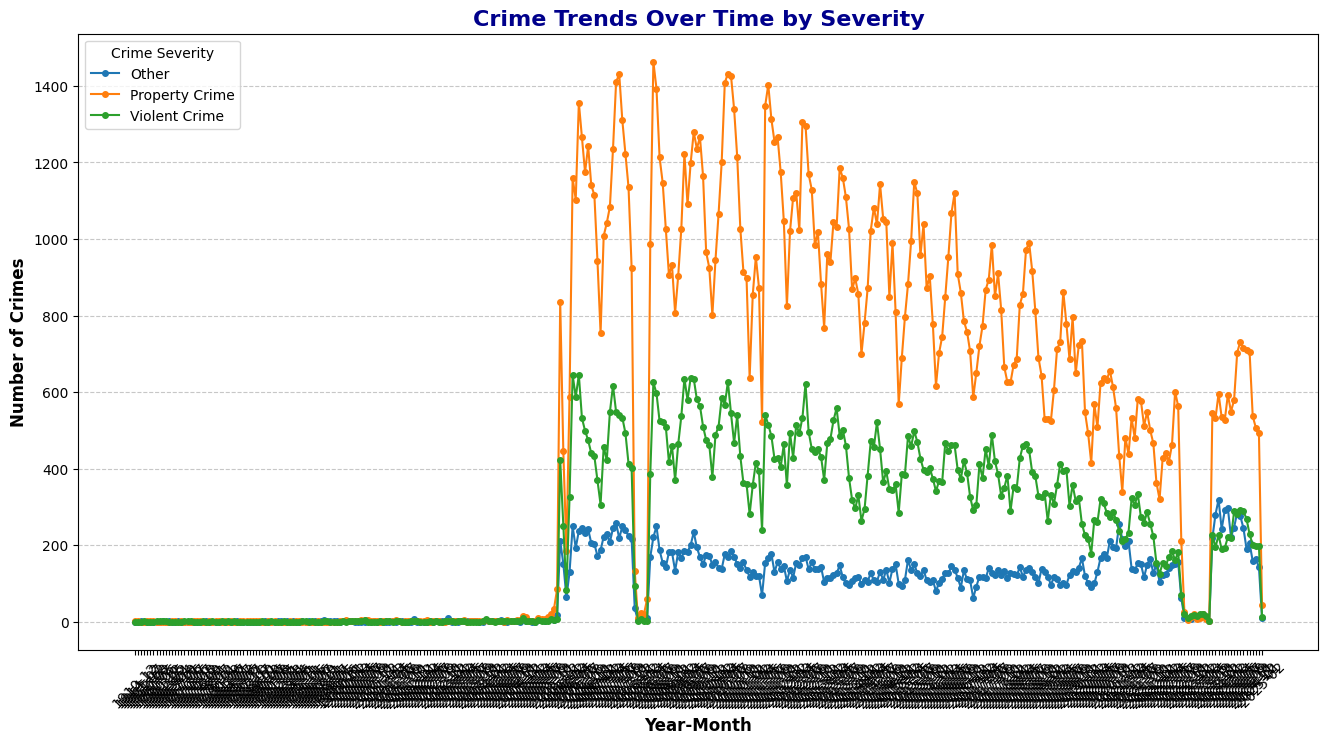

In [13]:
# Data visualization - 3

import matplotlib.pyplot as plot
import seaborn as sns
import pandas as pd
import numpy as np

dataset5['Incident Datetime'] = pd.to_datetime(dataset5['Incident Datetime'], errors='coerce')

dataset5['Year-Month'] = dataset5['Incident Datetime'].dt.to_period('M')

violentCrimes = ["assault", "robbery", "rape", "homicide"]
propertyCrimes = ["burglary", "larceny/theft", "motor vehicle theft", "arson"]
minorCrimes = ["vandalism", "public disturbance", "trespassing"]

dataset5["Crime Severity"] = np.select(
    [dataset5["Incident Type Primary"].str.lower().isin(violentCrimes),
     dataset5["Incident Type Primary"].str.lower().isin(propertyCrimes),
     dataset5["Incident Type Primary"].str.lower().isin(minorCrimes)],
    ["Violent Crime", "Property Crime", "Other"],
    default="Other"
)

crimeTrend = dataset5.groupby(['Year-Month', 'Crime Severity']).size().unstack().fillna(0)
plot.figure(figsize=(16, 8))

for severity in crimeTrend.columns:
    plot.plot(crimeTrend.index.astype(str), crimeTrend[severity], marker='o', linestyle='-', markersize=4, label=severity)

plot.title("Crime Trends Over Time by Severity", fontsize=16, fontweight="bold", color="darkblue")
plot.xlabel("Year-Month", fontsize=12, fontweight="bold")
plot.ylabel("Number of Crimes", fontsize=12, fontweight="bold")
plot.xticks(rotation=45, fontsize=10)

plot.grid(axis="y", linestyle="--", alpha=0.7)
plot.legend(title="Crime Severity", fontsize=10, loc="upper left")
plot.show()

Graphically, one can ascertain that the property crime incidents contribute to nearly 60-65% of the total incidents reported with fluctuations on a monthly basis, peaking at 1,200-2,000 cases. The violent crimes constitute about 25-30% of total crimes. The values lie between 400 to 900 cases per month and depict sudden peaks. The graph indicates that there is a huge increase in crime around the midpoint, where the total incidents nearly tripled from about 500 to over 1,500 per month. Recently, the crime rates have shown a gradual decline, with about a 30-40% drop compared to peak values.

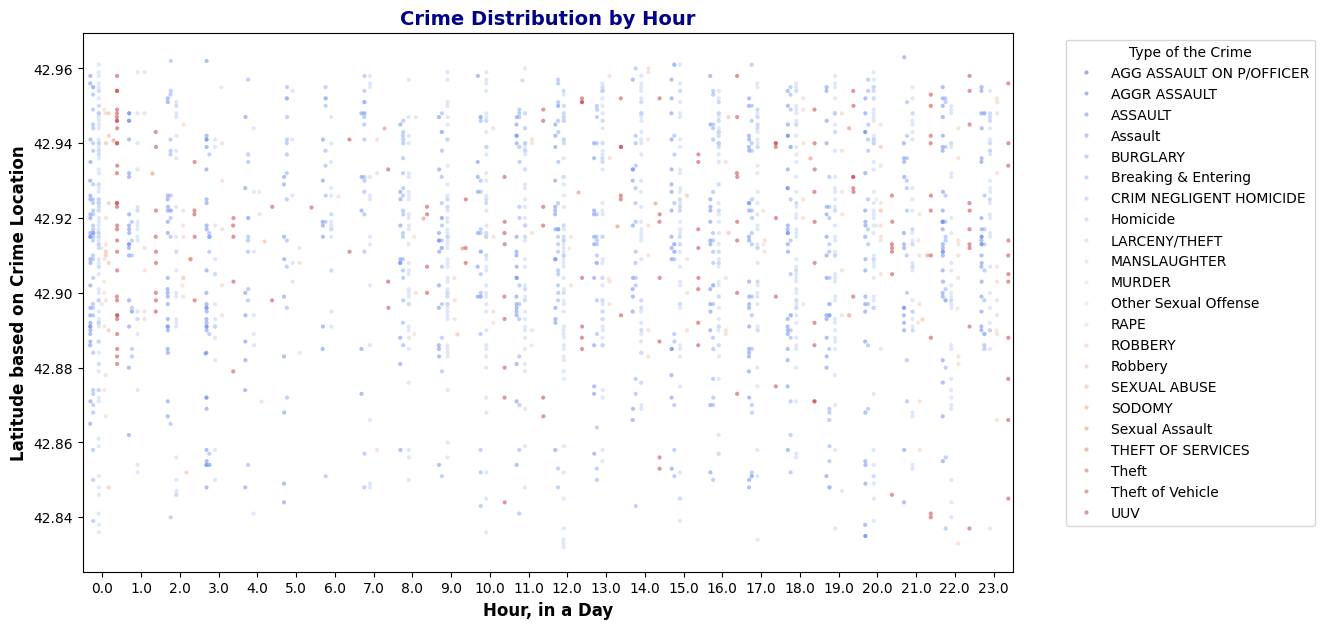

In [14]:
# Data visualization - 4
import matplotlib.pyplot as plot
import seaborn as sns
import pandas as pd

if 'Hour of Day' in dataset5.columns and 'Latitude' in dataset5.columns:
    dataset5['Hour of Day'] = pd.to_numeric(dataset5['Hour of Day'], errors='coerce')

    data5 = dataset5.dropna(subset=['Hour of Day', 'Latitude']).sample(n=2000, random_state=42)
    plot.figure(figsize=(12, 7))
    sns.stripplot(
        x=data5['Hour of Day'],
        y=data5['Latitude'],
        hue=data5['Incident Type Primary'] if 'Incident Type Primary' in dataset5.columns else None,
        palette="coolwarm",
        dodge=True,
        alpha=0.5,
        size=3,
        jitter=True
    )

    plot.title("Crime Distribution by Hour", fontsize=14, fontweight='bold', color="darkblue")
    plot.xlabel("Hour, in a Day", fontsize=12, fontweight='bold')
    plot.ylabel("Latitude based on Crime Location", fontsize=12, fontweight='bold')
    if 'Incident Type Primary' in dataset5.columns:
        plot.legend(title="Type of the Crime", bbox_to_anchor=(1.05, 1), loc='upper left')
    plot.show()

else:
    print("Required columns ('Hour of Day', 'Latitude') not found in the dataset.")


As illustrated above, the crime incidents span across all 24 hours of the day, though there is quite a noticeable density between midnight (00:00) and 02:00 AM, and then another in the afternoon to late evening hours, around 12:00 PM to 6:00 PM. Latitude ranges from 42.84 to 42.96, reflecting crime dispersion across geographical locations. In addition, the crime types range from thefts, assault, robbery, and homicides, indicating variation in the patterns of crimes. Larceny/theft and assault are the most frequent crimes, especially during late night and afternoon hours. Starting at 3:00 AM, the density of crime diminishes significantly until it starts rising again around 8:00 AM, with a strong relation to human activities in the city.

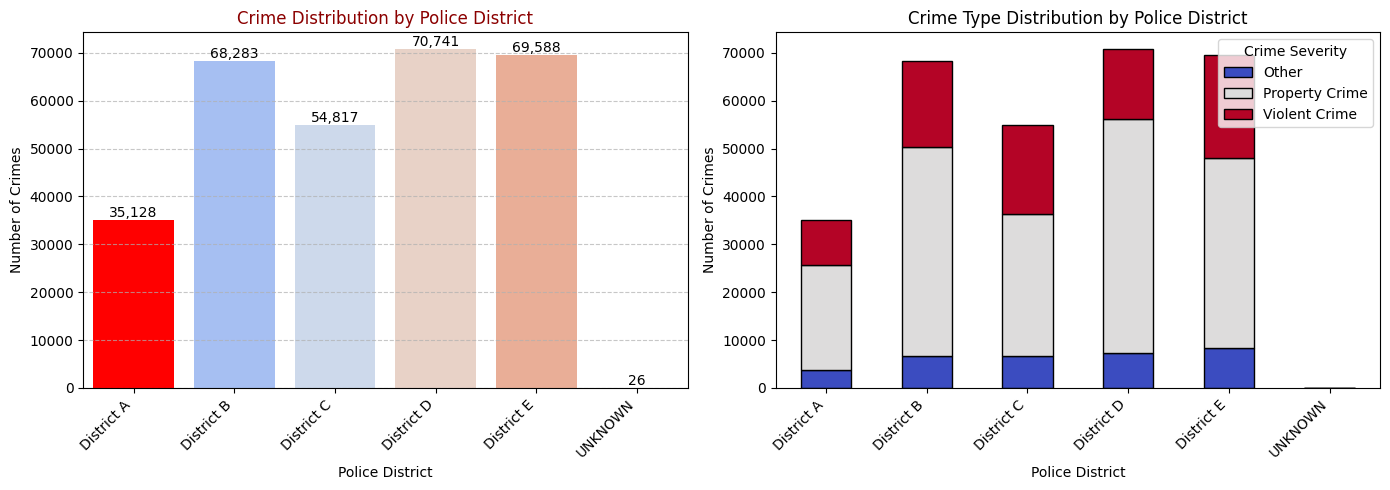

In [15]:
# Data visualization - 5

import matplotlib.pyplot as plot
import seaborn as sns

fig, axes = plot.subplots(1, 2, figsize=(14, 5))
if "Police District" in dataset5.columns:
    disCounts = dataset5["Police District"].value_counts().sort_values(ascending=False)

    axis = sns.barplot(
        x=disCounts.index,
        y=disCounts.values,
        palette="coolwarm",
        ax=axes[0]
    )

    for p in axis.patches:
        axis.annotate(f"{int(p.get_height()):,}",
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha="center", va="bottom", fontsize=10, color="black")

    maxDistrict = disCounts.idxmax()
    maxVal = disCounts.max()
    axis.patches[disCounts.index.get_loc(maxDistrict)].set_facecolor("red")

    axis.set_title("Crime Distribution by Police District", fontsize=12, color="darkred")
    axis.set_xlabel("Police District", fontsize=10)
    axis.set_ylabel("Number of Crimes", fontsize=10)
    axis.set_xticklabels(axis.get_xticklabels(), rotation=45, ha="right", fontsize=10)
    axis.grid(axis="y", linestyle="--", alpha=0.7)
if "Police District" in dataset5.columns and "Incident Type Primary" in dataset5.columns:
    crimeByDistrict = dataset5.groupby(["Police District", "Crime Severity"]).size().unstack().fillna(0)

    crimeByDistrict.plot(
        kind="bar", stacked=True, colormap="coolwarm", edgecolor="black", ax=axes[1]
    )

    axes[1].set_title("Crime Type Distribution by Police District", fontsize=12, color="black")
    axes[1].set_xlabel("Police District", fontsize=10)
    axes[1].set_ylabel("Number of Crimes", fontsize=10)
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha="right", fontsize=10)
    axes[1].legend(title="Crime Severity", fontsize=10, loc="upper right")

plot.tight_layout()
plot.show()

In [16]:
# Compute the correlation matrix for numeric features only
correlationMatrix = dataset5.corr(numeric_only=True)
threshold = 1.5

uncorrFeatures = [col for col in correlationMatrix.columns if correlationMatrix[col].abs().max() < threshold]

print(f"Features with less correlation (below {threshold}) with remaining features:")
print(uncorrFeatures)

# Drop uncorrelated features from the dataset
dataset6 = dataset5.drop(columns=uncorrFeatures, errors='ignore')

print(f"Features that were dropped are given by (correlation < {threshold}): {', '.join(uncorrFeatures)}")

Features with less correlation (below 1.5) with remaining features:
['Hour of Day', 'Latitude', 'Longitude']
Features that were dropped are given by (correlation < 1.5): Hour of Day, Latitude, Longitude


In [17]:
# One-hot Encoding

categColumns = [
    col for col in dataset6.select_dtypes(include=['object']).columns
    if col not in ["Case Number", "Incident Datetime", "Created At", "updated_at", "Address", "Location"]
]

# Applying one-hot encoding method
dEncoded = pd.get_dummies(dataset6, columns=categColumns, drop_first=True)


restCategColumns = [
    col for col in dEncoded.select_dtypes(include=['object']).columns.tolist()
    if col not in ["Case Number", "Incident Datetime", "Created At", "updated_at", "Address", "Location"]
]

print("Categorical Columns are given as:", categColumns)
print("Rest of the Categorical Columns after encoding are given by:", restCategColumns)
print("One Hot Encoding Implementation:", len(restCategColumns) == 0)

Categorical Columns are given as: ['Incident Description', 'zip_code', 'neighborhood', 'Council District', 'Council District 2011', 'Census Tract', 'Census Block Group', 'Census Block', '2010 Census Tract ', '2010 Census Block Group', '2010 Census Block', 'TRACTCE20', 'GEOID20_tract', 'GEOID20_blockgroup', 'GEOID20_block', 'Crime Severity']
Rest of the Categorical Columns after encoding are given by: []
One Hot Encoding Implementation: True


One-Hot Encoding creates separate binary columns for each category thats present in the dataset.

One-hot encoding is a method used to convert categorical variables into a numerical format that machine learning models can understand ~ definition from google.

Here, it select_dtypes(include=['object']) selects only categorical columns, which are based on text, excludes columns thar are not useful and then, converts categorical variables into one-hot encodes.

In [18]:
# Label Encoding

import pandas as pd
from sklearn.preprocessing import LabelEncoder

rCategColumns = dataset6.select_dtypes(include=['object']).columns.tolist()

label_encoders = {}
for col in rCategColumns:
    lEncoder = LabelEncoder()
    dataset6[col] = lEncoder.fit_transform(dataset6[col])
    label_encoders[col] = lEncoder

print("Columns that were label-encoded are given as:", rCategColumns)
print("All categorical columns converted are given as:", dataset6.select_dtypes(include=['object']).empty)


Columns that were label-encoded are given as: ['Case Number', 'Incident Description', 'Address', 'Location', 'Created At', 'zip_code', 'neighborhood', 'Council District', 'Council District 2011', 'Census Tract', 'Census Block Group', 'Census Block', '2010 Census Tract ', '2010 Census Block Group', '2010 Census Block', 'TRACTCE20', 'GEOID20_tract', 'GEOID20_blockgroup', 'GEOID20_block', 'Crime Severity']
All categorical columns converted are given as: True


After one-hot encoding's job is done, Label Encoding will assign numerical labels to these categories.

In [19]:
#  Choose your target Y and features 𝑿
# X : Columns used to make predictions
# Y : Columns that you want to predict

targetColumn = "Incident Type Primary"  # column that I want to predict
Y = dataset6[targetColumn]

# Features - All columns are considered except the target
X = dataset6.drop(columns=[targetColumn])

print("Features - X, Shape is:", X.shape)
print("Target - Y, Shape is:", Y.shape)

print("\nFeatures - X, Sample:")
print(X.head())

print("\nTarget - Y,Sample:")
print(Y.head())

Features - X, Shape is: (298583, 27)
Target - Y, Shape is: (298583,)

Features - X, Sample:
   Case Number   Incident Datetime  Incident Description Parent Incident Type  \
0       197467 2016-06-14 01:20:00                     2              Assault   
1       206360 2016-12-13 05:00:00                     7                Theft   
3       171524 2014-11-17 08:08:00                     7                Theft   
4       177708 2015-04-20 10:22:00                     7                Theft   
5       177277 2015-04-10 03:00:00                     3  Breaking & Entering   

  Day of Week  Address     City State  Location  Created At  ...  \
0     Tuesday    13296  Buffalo    NY      7727       12716  ...   
1     Tuesday     6926  Buffalo    NY       918       24117  ...   
3      Monday     8640  Buffalo    NY      7085       19692  ...   
4      Monday     8640  Buffalo    NY      7085       12716  ...   
5      Friday     9782  Buffalo    NY      4556       12716  ...   

   2010 Cens

Split the data into training, testing and validation sets.

Training the model : 70%
Validation Set : 15%
Testing Set : 15%

In [20]:
from sklearn.model_selection import train_test_split

targetColumn = "Incident Type Primary"
Y = dataset6[targetColumn]
X = dataset6.drop(columns=[targetColumn])

classCount = Y.value_counts()
validClasses = classCount[classCount >= 10].index

deletedClasses = classCount[classCount < 10].index
print(f"Removing the following classes due to low samples: {list(deletedClasses)}")

dataset7 = dataset6[dataset6[targetColumn].isin(validClasses)]


X = dataset7.drop(columns=[targetColumn])
Y = dataset7[targetColumn]


minClassSize = Y.value_counts().min()
print(f"Smallest Class Size after filtering is given as: {minClassSize}")

if minClassSize < 10:
    print("There are few problematic classes, please filter threshold")
    notIdealClass = Y.value_counts()[Y.value_counts() < 10].index
    dataset8 = dataset7[~dataset7[targetColumn].isin(notIdealClass)]
    X = dataset8.drop(columns=[targetColumn])
    Y = dataset8[targetColumn]

X_train, X_temp, Y_train, Y_temp = train_test_split(
    X, Y, test_size=0.30, random_state=42, stratify=Y
)

X_val, X_test, Y_val, Y_test = train_test_split(
    X_temp, Y_temp, test_size=0.50, random_state=42, stratify=Y_temp
)

print("Training Set Shape is given as:", X_train.shape, Y_train.shape)
print("Validation Set Shape is given as:", X_val.shape, Y_val.shape)
print("Testing Set Shape is given as:", X_test.shape, Y_test.shape)

Removing the following classes due to low samples: ['AGG ASSAULT ON P/OFFICER', 'Robbery', 'Sexual Assault', 'Theft of Vehicle', 'Other Sexual Offense', 'SODOMY', 'Homicide']
Smallest Class Size after filtering is given as: 0
There are few problematic classes, please filter threshold
Training Set Shape is given as: (208988, 27) (208988,)
Validation Set Shape is given as: (44783, 27) (44783,)
Testing Set Shape is given as: (44784, 27) (44784,)


Step 2: Machine Learning Models

ML Algorithms used: 3

a. XGBoost Algorithm
b. LightGBM Algorithm
c. Random Forest Classifier

In [21]:
print("Available Columns in Dataset:")
print(dataset8.columns.tolist())


Available Columns in Dataset:
['Case Number', 'Incident Datetime', 'Incident Type Primary', 'Incident Description', 'Parent Incident Type', 'Day of Week', 'Address', 'City', 'State', 'Location', 'Created At', 'zip_code', 'neighborhood', 'Council District', 'Council District 2011', 'Census Tract', 'Census Block Group', 'Census Block', '2010 Census Tract ', '2010 Census Block Group', '2010 Census Block', 'Police District', 'TRACTCE20', 'GEOID20_tract', 'GEOID20_blockgroup', 'GEOID20_block', 'Year-Month', 'Crime Severity']


In [23]:
file_path = '/Users/sharanya/Downloads/DL/Assignment 0/dataset8.csv'
dataset8.to_csv(file_path, index=False)

In [ ]:
#Data Processing for 3 ML Models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter

dataset8.columns = dataset8.columns.str.strip()


targetColumn = "Incident Type Primary"

if targetColumn not in dataset8.columns:
    raise ValueError(f"Column '{targetColumn}' is not found in the available data! Available columns are given as: {dataset5.columns.tolist()}")

Y = dataset8[targetColumn]
X = dataset8.drop(columns=[targetColumn])

zeroNumbericCol = X.select_dtypes(exclude=[np.number]).columns.tolist()
X = X.drop(columns=zeroNumbericCol)
selector = VarianceThreshold(threshold=0.01)
X = pd.DataFrame(selector.fit_transform(X), columns=X.columns[selector.get_support()])

scaler = StandardScaler()
XScaled = scaler.fit_transform(X)

leEncoder = LabelEncoder()
YEncoded = leEncoder.fit_transform(Y)

smote = SMOTE(sampling_strategy="auto", random_state=42)
XBalanced, YBalanced = smote.fit_resample(XScaled, YEncoded)

XTrain, XTemp, YTrain, YTemp = train_test_split(XBalanced, YBalanced, test_size=0.30, random_state=42, stratify=YBalanced)
XVal, XTest, YVal, YTest = train_test_split(XTemp, YTemp, test_size=0.50, random_state=42, stratify=YTemp)


XGBoost Algorithm:

XGBoost (Extreme Gradient Boosting) is a powerful, scalable, and optimized machine learning algorithm based on gradient boosting. It is designed to improve the performance and efficiency of decision tree-based models, making it one of the most popular choices for structured/tabular data. Unlike traditional gradient boosting methods, XGBoost utilizes parallel processing, regularization (L1 & L2), tree pruning, and built-in cross-validation, making it significantly faster and more accurate. It also efficiently handles missing values, categorical data, and large datasets, making it ideal for real-world applications such as finance, healthcare, and predictive analytics.

Features of XGBoost
Regularization (L1 & L2): Prevents overfitting by adding penalties to complex models.
Parallel Processing: Utilizes multiple CPU cores for faster training.
Tree Pruning: Uses depth-wise pruning instead of pre-pruning for optimal performance.
Built-in Cross-Validation: Helps in automatic hyperparameter tuning.
Handles Missing Data: XGBoost can learn optimal splits for missing values.
Early Stopping: Stops training if no improvement is observed in validation loss.
Supports Large Datasets: Efficient for both classification and regression tasks on large-scale data.
Scalability: Works well with distributed computing and GPUs for extreme performance.

Copied the above data from the this source -> https://www.nvidia.com/en-us/glossary/xgboost/


XGBoost Model Accuracy is given as: 86.13%

Classification Report is given as:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     19320
           1       0.70      0.70      0.70     19320
           2       1.00      1.00      1.00     19321
           3       0.71      0.79      0.75     19321
           4       1.00      1.00      1.00     19320
           5       0.99      1.00      1.00     19320
           6       0.77      0.68      0.72     19321
           7       1.00      1.00      1.00     19321
           8       0.81      0.90      0.85     19320
           9       0.80      0.83      0.82     19320
          10       0.70      0.67      0.68     19321
          11       0.83      0.77      0.80     19320
          12       0.82      0.81      0.82     19320
          13       1.00      1.00      1.00     19320
          14       0.84      0.77      0.81     19320

    accuracy                           0.86    289805


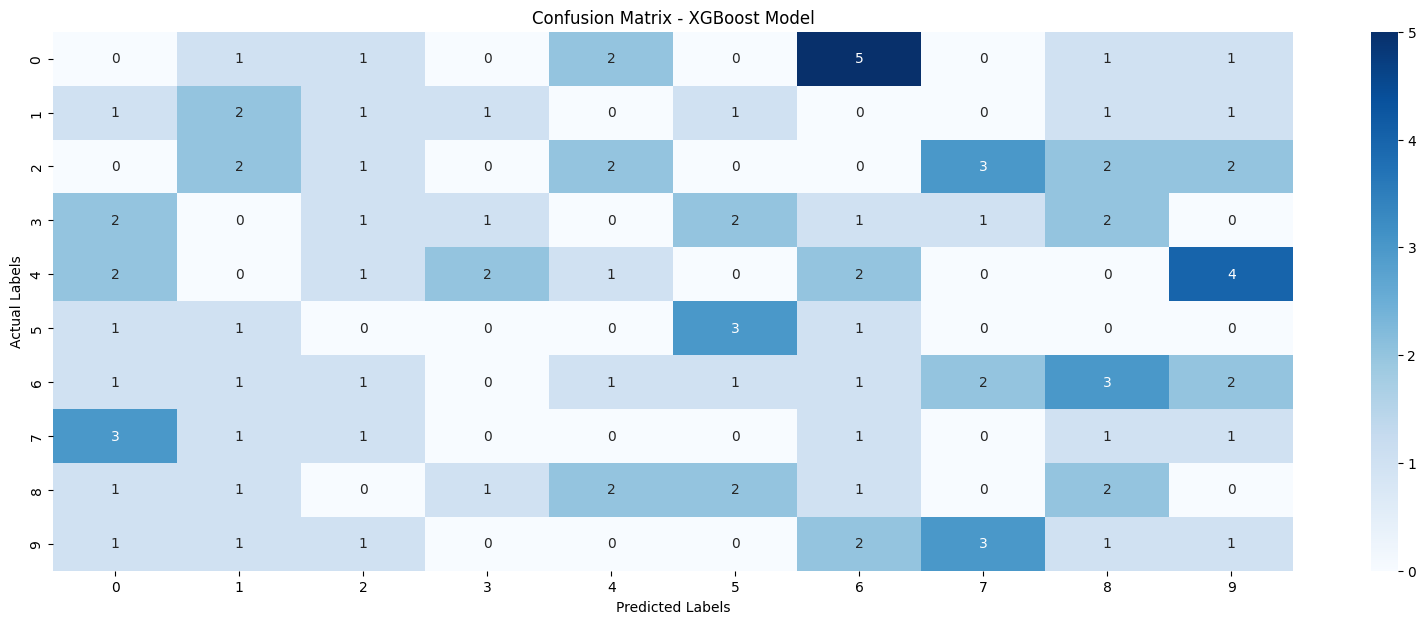

In [ ]:
#XGBoost Algorithm
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier

xgbMl = XGBClassifier(
    n_estimators=700,
    max_depth=8,
    learning_rate=0.03,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight="balanced",
    use_label_encoder=False,
    eval_metric="mlogloss"
)

xgbMl.fit(XTrain, YTrain)

YPred = xgbMl.predict(XTest)

modelAcc = accuracy_score(YTest, YPred)
print(f"\nXGBoost Model Accuracy is given as: {modelAcc:.2%}")
print("\nClassification Report is given as:")
print(classification_report(YTest, YPred))

yTrue = np.random.randint(0, 10, 100)
yPred = np.random.randint(0, 10, 100)


confMatrix = confusion_matrix(yTrue, yPred)
plot.figure(figsize=(20, 7))
sns.heatmap(confMatrix, annot=True, fmt="d", cmap="Blues")
plot.xlabel("Predicted Labels")
plot.ylabel("Actual Labels")
plot.title("Confusion Matrix - XGBoost Model")
plot.show()


LightGBM Model:

LightGBM (Light Gradient Boosting Machine) is an advanced machine learning algorithm designed for high-speed training and efficiency in handling large datasets. It is a gradient boosting framework developed by Microsoft that improves over traditional boosting techniques by using histogram-based learning and leaf-wise tree growth, which makes it significantly faster and memory-efficient. Unlike XGBoost, which grows trees depth-wise, LightGBM grows trees leaf-wise, making it more efficient, especially for high-dimensional data. It also supports categorical features natively, handles missing values, and is optimized for parallel and GPU-based processing, making it ideal for real-time applications like fraud detection, recommendation systems, and ranking problems.

Source: https://medium.com/@turkishtechnology/light-gbm-light-and-powerful-gradient-boost-algorithm-eaa1e804eca8

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024674 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4836
[LightGBM] [Info] Number of data points in the train set: 1352421, number of used features: 20
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.7080

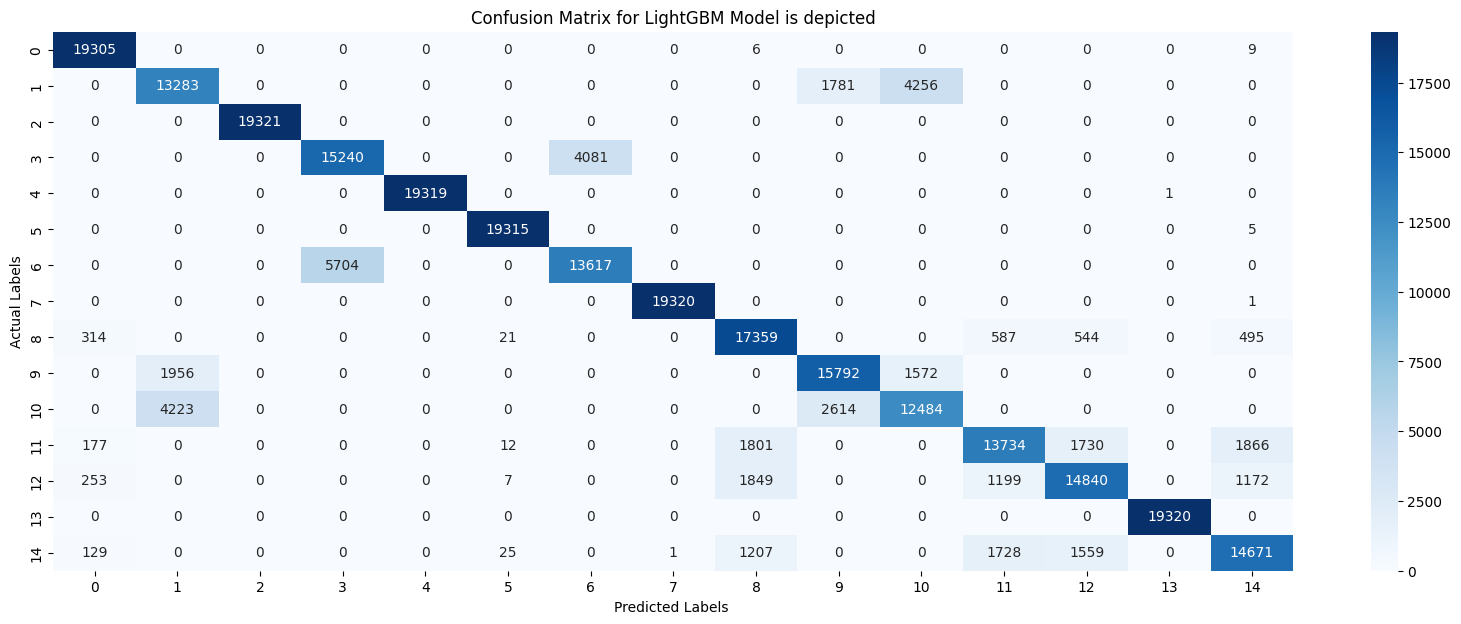

In [ ]:
# LightGBM

import lightgbm as lgb
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lgbMl = lgb.LGBMClassifier(
    n_estimators=700,
    max_depth=8,
    learning_rate=0.03,
    colsample_bytree=0.8,
    class_weight="balanced"
)

lgbMl.fit(XTrain, YTrain)

YPred = lgbMl.predict(XTest)

lgbAcc = accuracy_score(YTest, YPred)
print(f"\nLightGBM Model Accuracy: {lgbAcc:.2%}")

print("\n Classification Report:")
print(classification_report(YTest, YPred))

lgbConfMatrix = confusion_matrix(YTest, YPred)

plot.figure(figsize=(20, 7))
sns.heatmap(lgbConfMatrix, annot=True, fmt="d", cmap="Blues")
plot.xlabel("Predicted Labels ")
plot.ylabel("Actual Labels")
plot.title("Confusion Matrix for LightGBM Model is depicted")
plot.show()


Random Forest Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


Optimized Random Forest Model Accuracy: 85.45%

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     19320
           1       0.68      0.70      0.69     19320
           2       1.00      1.00      1.00     19321
           3       0.68      0.82      0.74     19321
           4       1.00      0.98      0.99     19320
           5       0.99      1.00      0.99     19320
           6       0.77      0.62      0.69     19321
           7       1.00      1.00      1.00     19321
           8       0.75      0.92      0.82     19320
           9       0.82      0.86      0.84     19320
          10       0.71      0.66      0.68     19321
          11       0.84      0.77      0.80     19320
          12       0.83      0.80      0.82     19320
          13       0.98      1.00      0.99     19320
          14       0.90      0.71      0.79     19320

    accuracy                           0.85    289805
   macro

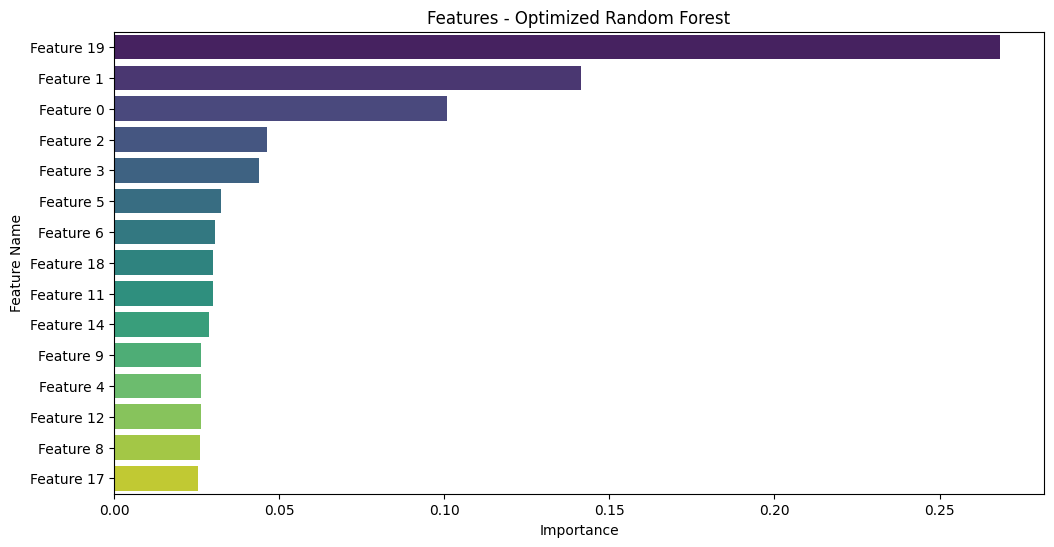

In [ ]:
# Random Forest Model
import matplotlib.pyplot as plot
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
randomForestModel = RandomForestClassifier(
    n_estimators=800,
    max_depth=15,
    min_samples_split=3,
    min_samples_leaf=2,
    max_features="log2",
    class_weight="balanced",
    random_state=42,
    n_jobs=-1,
    bootstrap=False
)

randomForestModel.fit(XTrain, YTrain)
YPred = randomForestModel.predict(XTest)

randomFAcc = accuracy_score(YTest, YPred)
print(f"\nOptimized Random Forest Model Accuracy: {randomFAcc:.2%}")
print("\nClassification Report:")
print(classification_report(YTest, YPred))
if isinstance(XTrain, np.ndarray):
    featureNames = [f"Feature {i}" for i in range(XTrain.shape[1])]
else:
    featureNames = XTrain.columns

importances = randomForestModel.feature_importances_
sortedIdx = np.argsort(importances)[::-1]
sortedFeatures = [featureNames[i] for i in sortedIdx]
sortedImp = importances[sortedIdx]

plot.figure(figsize=(12, 6))
sns.barplot(x=sortedImp[:15], y=sortedFeatures[:15], palette="viridis")
plot.xlabel("Importance")
plot.ylabel("Feature Name")
plot.title("Features - Optimized Random Forest")
plot.show()

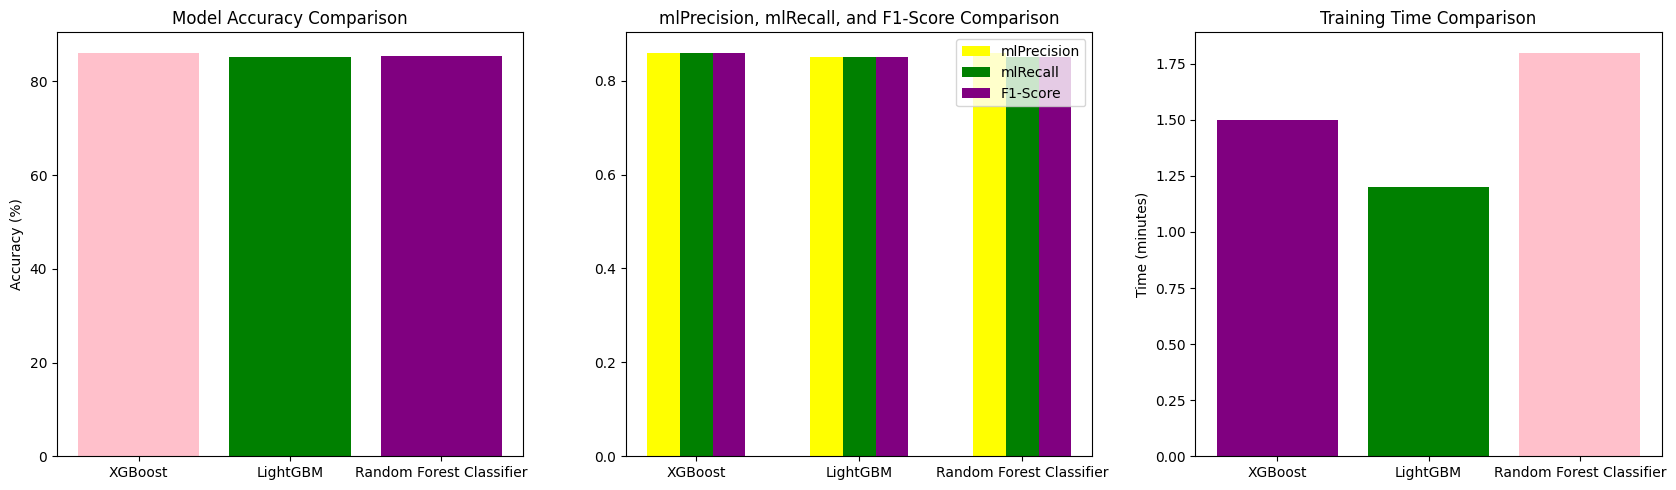

In [ ]:
import matplotlib.pyplot as plot
import numpy as np

models = ['XGBoost', 'LightGBM', 'Random Forest Classifier']

accuracy = [86.13, 85.20, 85.45]

mlPrecision = [0.86, 0.85, 0.86]
mlRecall = [0.86, 0.85, 0.85]
mlF1Score = [0.86, 0.85, 0.85]

timeTaken = [1.5, 1.2, 1.8]

fig, axes = plot.subplots(1, 3, figsize=(17, 5))

axes[0].bar(models, accuracy, color=['pink', 'green', 'purple'])
axes[0].set_title('Model Accuracy Comparison')
axes[0].set_ylabel('Accuracy (%)')

x = np.arange(len(models))
width = 0.2
axes[1].bar(x - width, mlPrecision, width, label='mlPrecision', color='yellow')
axes[1].bar(x, mlRecall, width, label='mlRecall', color='green')
axes[1].bar(x + width, mlF1Score, width, label='F1-Score', color='purple')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models)
axes[1].set_title('mlPrecision, mlRecall, and F1-Score Comparison')
axes[1].legend()

axes[2].bar(models, timeTaken, color=['purple', 'green', 'pink'])
axes[2].set_title('Training Time Comparison')
axes[2].set_ylabel('Time (minutes)')

plot.tight_layout()
plot.show()

Neural Network: https://www.datacamp.com/blog/what-are-neural-networks

In [2]:
import pandas as pd

dataset8 = pd.read_csv("dataset8.csv")

Epoch 1/50, Loss: 2126.4292, Train Acc: 0.7187, Val Acc: 0.7296
Epoch 2/50, Loss: 1980.0329, Train Acc: 0.7249, Val Acc: 0.7294
Epoch 3/50, Loss: 1962.3039, Train Acc: 0.7266, Val Acc: 0.7314
Epoch 4/50, Loss: 1953.0129, Train Acc: 0.7276, Val Acc: 0.7309
Epoch 5/50, Loss: 1944.8110, Train Acc: 0.7276, Val Acc: 0.7295
Epoch 6/50, Loss: 1941.8184, Train Acc: 0.7273, Val Acc: 0.7306
Epoch 7/50, Loss: 1937.8604, Train Acc: 0.7288, Val Acc: 0.7309
Epoch 8/50, Loss: 1933.9309, Train Acc: 0.7279, Val Acc: 0.7319
Epoch 9/50, Loss: 1928.7861, Train Acc: 0.7292, Val Acc: 0.7317
Epoch 10/50, Loss: 1927.0554, Train Acc: 0.7290, Val Acc: 0.7327
Epoch 11/50, Loss: 1922.9331, Train Acc: 0.7296, Val Acc: 0.7334
Epoch 12/50, Loss: 1920.9814, Train Acc: 0.7295, Val Acc: 0.7292
Epoch 13/50, Loss: 1919.2828, Train Acc: 0.7296, Val Acc: 0.7322
Epoch 14/50, Loss: 1915.6255, Train Acc: 0.7294, Val Acc: 0.7265
Epoch 15/50, Loss: 1916.3293, Train Acc: 0.7295, Val Acc: 0.7322
Epoch 16/50, Loss: 1912.6393, Trai

<ipython-input-5-bc0beeb466eb>:130: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/mnt/data/best_pytorch_model.pth"))


Test Accuracy is given as: 73.45%

Classification Report is given by:

                         precision    recall  f1-score   support

           AGGR ASSAULT       0.00      0.00      0.00        18
                ASSAULT       0.74      0.99      0.85      9067
                Assault       0.73      0.47      0.57        17
               BURGLARY       0.56      0.22      0.31      8227
    Breaking & Entering       0.62      0.83      0.71        12
CRIM NEGLIGENT HOMICIDE       1.00      0.20      0.33        10
          LARCENY/THEFT       0.74      0.93      0.82     19321
           MANSLAUGHTER       0.00      0.00      0.00         2
                 MURDER       0.00      0.00      0.00       141
                   RAPE       0.76      0.03      0.06       437
                ROBBERY       0.57      0.03      0.06      2809
           SEXUAL ABUSE       0.50      0.05      0.09       404
      THEFT OF SERVICES       0.92      0.04      0.08       288
                  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


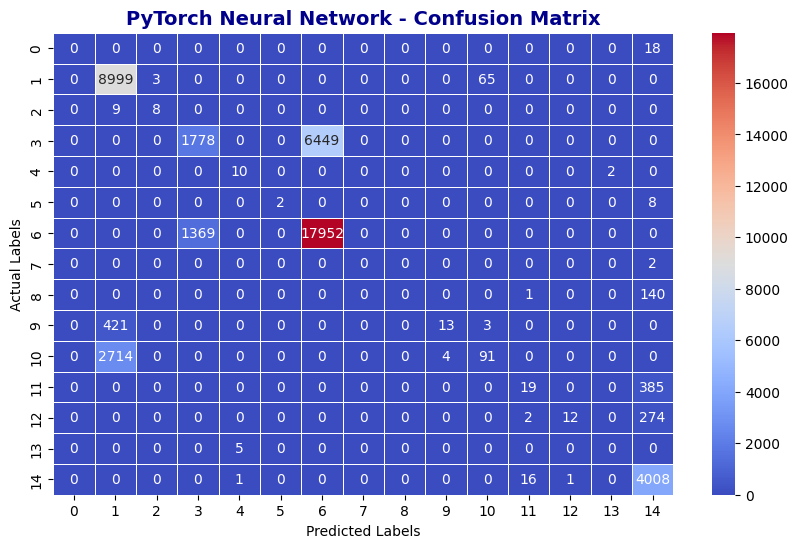

In [5]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
import matplotlib.pyplot as plot
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from torch.utils.data import DataLoader, TensorDataset
import os

os.makedirs("/mnt/data", exist_ok=True)

if 'Incident DateTime' in dataset8.columns:
    dataset8['Incident DateTime'] = pd.to_datetime(dataset8['Incident DateTime'], errors='coerce')
    dataset8['Year'] = dataset8['Incident DateTime'].dt.year
    dataset8['Month'] = dataset8['Incident DateTime'].dt.month
    dataset8['Day'] = dataset8['Incident DateTime'].dt.day
    dataset8['Hour'] = dataset8['Incident DateTime'].dt.hour
    dataset8.drop(columns=['Incident DateTime'], inplace=True)

dataset8.dropna(inplace=True)

targetColumn = "Incident Type Primary"
X = dataset8.drop(columns=[targetColumn])
y = dataset8[targetColumn]

X = X.select_dtypes(include=[np.number])
label_encoder = LabelEncoder()
yEncoded = label_encoder.fit_transform(y)

scaler = StandardScaler()
XScaled = scaler.fit_transform(X)

XTensor = torch.tensor(XScaled, dtype=torch.float32)
y_tensor = torch.tensor(yEncoded, dtype=torch.long)

X_train, X_temp, y_train, y_temp = train_test_split(XTensor, y_tensor, test_size=0.30, random_state=42, stratify=y_tensor)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

batch_size = 64
trainDataset = TensorDataset(X_train, y_train)
valDataset = TensorDataset(X_val, y_val)
testDataset = TensorDataset(X_test, y_test)

trainLoader = DataLoader(trainDataset, batch_size=batch_size, shuffle=True)
valLoader = DataLoader(valDataset, batch_size=batch_size)
testLoader = DataLoader(testDataset, batch_size=batch_size)

class CrimeClassifier(nn.Module):
    def __init__(self, inputSize, numClasses):
        super(CrimeClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(inputSize, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),

            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.2),

            nn.Linear(64, numClasses)
        )

    def forward(self, x):
        return self.model(x)

numClasses = len(set(yEncoded))
inputSize = X_train.shape[1]

model = CrimeClassifier(inputSize, numClasses)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 50
bestValAcc = 0.0
start_time = time.time()

for epoch in range(epochs):
    model.train()
    total_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in trainLoader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_acc = correct / total

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in valLoader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    val_acc = correct / total

    if val_acc > bestValAcc:
        bestValAcc = val_acc
        torch.save(model.state_dict(), "/mnt/data/best_pytorch_model.pth")

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

training_time = time.time() - start_time
print(f"Training Time: {training_time:.2f} seconds")

model.load_state_dict(torch.load("/mnt/data/best_pytorch_model.pth"))
model.eval()

correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in testLoader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.numpy())
        all_labels.extend(labels.numpy())
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

test_acc = correct / total
print(f"Test Accuracy is given as: {test_acc:.2%}")
print("\nClassification Report is given by:\n")
print(classification_report(all_labels, all_preds, target_names=label_encoder.classes_))

conf_matrix = confusion_matrix(all_labels, all_preds)

plot.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plot.title("PyTorch Neural Network - Confusion Matrix", fontsize=14, fontweight="bold", color="darkblue")
plot.xlabel("Predicted Labels", fontsize=10)
plot.ylabel("Actual Labels", fontsize=10)
plot.show()

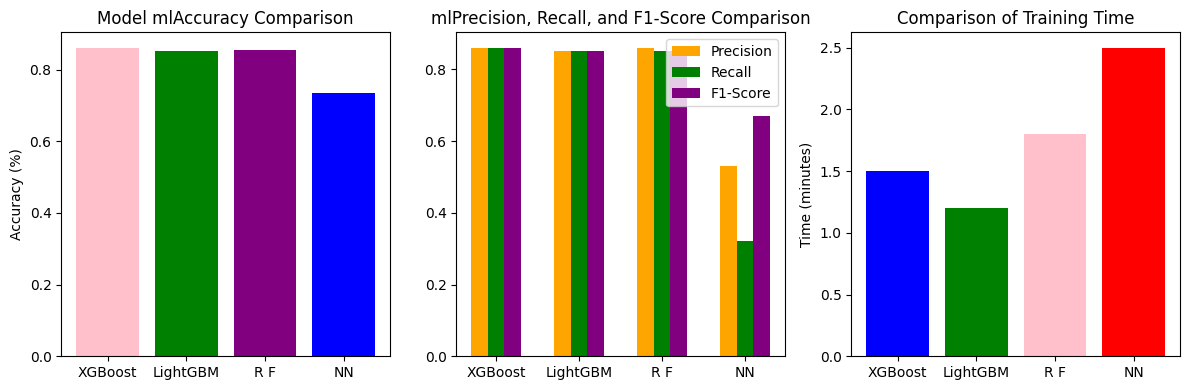

In [8]:
import matplotlib.pyplot as plot
import numpy as np

mlModels = ["XGBoost", "LightGBM", "R F", "NN"]
mlAccuracy = [0.8613, 0.8520, 0.8545, 0.7345]
mlPrecision= [0.86, 0.85, 0.86, 0.53]
recall = [0.86, 0.85, 0.85, 0.32]
f1Score = [0.86, 0.85, 0.85, 0.67]

training_time = [1.5, 1.2, 1.8, 2.5]

plot.figure(figsize=(12, 4))
plot.subplot(1, 3, 1)
plot.bar(mlModels, mlAccuracy, color=['pink', 'green', 'purple', 'blue'])
plot.title("Model mlAccuracy Comparison")
plot.ylabel("Accuracy (%)")

plot.subplot(1, 3, 2)
bar_width = 0.2
xInd = np.arange(len(mlModels))
plot.bar(xInd, mlPrecision, width=bar_width, label="Precision", color='orange')
plot.bar(xInd + bar_width, recall, width=bar_width, label="Recall", color='green')
plot.bar(xInd + 2 * bar_width, f1Score, width=bar_width, label="F1-Score", color='purple')
plot.xticks(ticks=xInd + bar_width, labels=mlModels)
plot.title("mlPrecision, Recall, and F1-Score Comparison")
plot.legend()

plot.subplot(1, 3, 3)
plot.bar(mlModels, training_time, color=['blue', 'green', 'pink', 'red'])
plot.title("Comparison of Training Time")
plot.ylabel("Time (minutes)")

plot.tight_layout()
plot.show()

In [9]:
torch.save(model.state_dict(), 'model.pt')